# Amphora origins and contents

## Contents 
1. [<span style="color:black">Import packages</span>](#1) <a id="one"></a>  
2. [<span style="color:black">Read in data</span>](#2)  <a id="two"></a>  
3. [<span style="color:black">Percentage of amphorae per origin</span>](#3) <a id="three"></a>  
4. [<span style="color:black">Percentage of amphorae per contents</span>](#4)  <a id="four"></a>   
5. [<span style="color:black">Plot the box plots</span>](#5)  <a id="five"></a>  

### [<span style="color:black">1. Import packages</span>](#one) <a id="1"></a> 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### [<span style="color:black">2. Read in data</span>](#two)  <a id="2"></a>

In [3]:
data = pd.read_csv("../data/RAAD_data_restructured.csv")
data["origin_h2"] = data["origin_h2"].fillna('')

In [4]:
contents = ["defrutum/olives", "fish sauce or defrutum",  "defrutum or olives", "wine or fishsauce", "olive oil?", "olive oil/ unknown"]
 
for row in range(len(data)):
    if data["contents"].iloc[row] in contents:
        data["contents"].iloc[row] = "unknown"
    elif data["contents"].iloc[row] == "olives" or data["contents"].iloc[row] == "olive oil":
        data["contents"].iloc[row] = "olive oil and olives" 
    elif data["origin_h1"].iloc[row] == "unknown(iberianpeninsula)":
        data["origin_h1"].iloc[row] = "unknown"

/tmp/ipykernel_8801/680691063.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["contents"].iloc[row] = "unknown"
/tmp/ipykernel_8801/680691063.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["contents"].iloc[row] = "olive oil and olives"
/tmp/ipykernel_8801/680691063.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["origin_h1"].iloc[row] = "unknown"


### [<span style="color:black">3. Percentage of amphorae per origin</span>](#three) <a id="3"></a>

In [5]:
freq_site_origin = data.groupby(["origin_h1", "site_name_modern"])["frequency"].sum()
freq_site_origin = freq_site_origin.reset_index()
freq_site_origin = freq_site_origin.rename(columns={"frequency": "summed_freq"})
freq_site_origin

,origin_h1,site_name_modern,summed_freq
0,em,aislingen,1
1,em,alphen aan den rijn,5
2,em,alzey,2
3,em,anreppen,46
4,em,augsburg,6
...,...,...,...
386,unknown,voorburg,4
387,unknown,waldgirmes,1
388,unknown,walheim,1
389,unknown,worms,4


In [6]:
total_freq_site = freq_site_origin.groupby(["site_name_modern"])["summed_freq"].sum()
total_freq_site = total_freq_site .reset_index()
total_freq_site = total_freq_site .rename(columns={"summed_freq": "total_freq"})
total_freq_site 

,site_name_modern,total_freq
0,aislingen,11
1,alphen aan den rijn,600
2,altenstadt,220
3,alzey,342
4,anreppen,284
...,...,...
74,waldgirmes,1089
75,walheim,87
76,winsum,48
77,worms,486


In [7]:
merged_df0 = freq_site_origin.merge(total_freq_site, on = "site_name_modern")
merged_df0

,origin_h1,site_name_modern,summed_freq,total_freq
0,em,aislingen,1,11
1,gaul,aislingen,2,11
2,iberianpeninsula,aislingen,4,11
3,italy,aislingen,2,11
4,unknown,aislingen,2,11
...,...,...,...,...
386,iberianpeninsula,augsburg-oberhausen,2,5
387,italy,augsburg-oberhausen,2,5
388,unknown,augsburg-oberhausen,1,5
389,iberianpeninsula,vetera i,253,275


In [8]:
merged_df0["percentage"] = ""
merged_df0["percentage"] = (merged_df0["summed_freq"]/merged_df0["total_freq"]).apply(lambda x: "{0:.0%}".format(x))
merged_df0["percentage"] = merged_df0["percentage"].apply(lambda x: x.replace("%", ""))
merged_df0["percentage"] = pd.to_numeric(merged_df0["percentage"],errors='coerce')
merged_df0

,origin_h1,site_name_modern,summed_freq,total_freq,percentage
0,em,aislingen,1,11,9
1,gaul,aislingen,2,11,18
2,iberianpeninsula,aislingen,4,11,36
3,italy,aislingen,2,11,18
4,unknown,aislingen,2,11,18
...,...,...,...,...,...
386,iberianpeninsula,augsburg-oberhausen,2,5,40
387,italy,augsburg-oberhausen,2,5,40
388,unknown,augsburg-oberhausen,1,5,20
389,iberianpeninsula,vetera i,253,275,92


### [<span style="color:black">4. Percentage of amphorae per contents</span>](#four) <a id="4"></a>  

In [9]:
freq_site_contents = data.groupby(["contents","site_number"])["frequency"].sum()
freq_site_contents = freq_site_contents.reset_index()
freq_site_contents = freq_site_contents.rename(columns={"frequency": "summed_freq"})
freq_site_contents

,contents,site_number,summed_freq
0,alum,9,36
1,alum,10,1
2,alum,33,26
3,alum,38,1
4,alum,46,1
...,...,...,...
325,wine,75,182
326,wine,76,9
327,wine,77,15
328,wine,78,52


In [10]:
total_freq_contents = freq_site_contents.groupby(["site_number"])["summed_freq"].sum()
total_freq_contents = total_freq_contents.reset_index()
total_freq_contents = total_freq_contents.rename(columns={"summed_freq": "total_freq"})
total_freq_contents

,site_number,total_freq
0,1,11
1,2,600
2,3,220
3,4,342
4,5,284
...,...,...
74,75,1089
75,76,87
76,77,48
77,78,486


In [11]:
merged_df1 = freq_site_contents.merge(total_freq_contents, on = "site_number")
merged_df1

,contents,site_number,summed_freq,total_freq
0,alum,9,36,5556
1,fish sauce,9,1192,5556
2,fruit,9,31,5556
3,olive oil and olives,9,2062,5556
4,unknown,9,547,5556
...,...,...,...,...
325,unknown,74,13,113
326,wine,74,40,113
327,olive oil and olives,76,34,87
328,unknown,76,44,87


In [12]:
merged_df1["percentage"] = ''
merged_df1["percentage"] = (merged_df1["summed_freq"]/merged_df1["total_freq"]).apply(lambda x: "{0:.0%}".format(x))
merged_df1["percentage"] = merged_df1["percentage"].apply(lambda x: x.replace("%", ""))
merged_df1["percentage"] = pd.to_numeric(merged_df1["percentage"],errors='coerce')
merged_df1

,contents,site_number,summed_freq,total_freq,percentage
0,alum,9,36,5556,1
1,fish sauce,9,1192,5556,21
2,fruit,9,31,5556,1
3,olive oil and olives,9,2062,5556,37
4,unknown,9,547,5556,10
...,...,...,...,...,...
325,unknown,74,13,113,12
326,wine,74,40,113,35
327,olive oil and olives,76,34,87,39
328,unknown,76,44,87,51


### [<span style="color:black">5. Plot the box plots</span>](#five) <a id="5"></a>

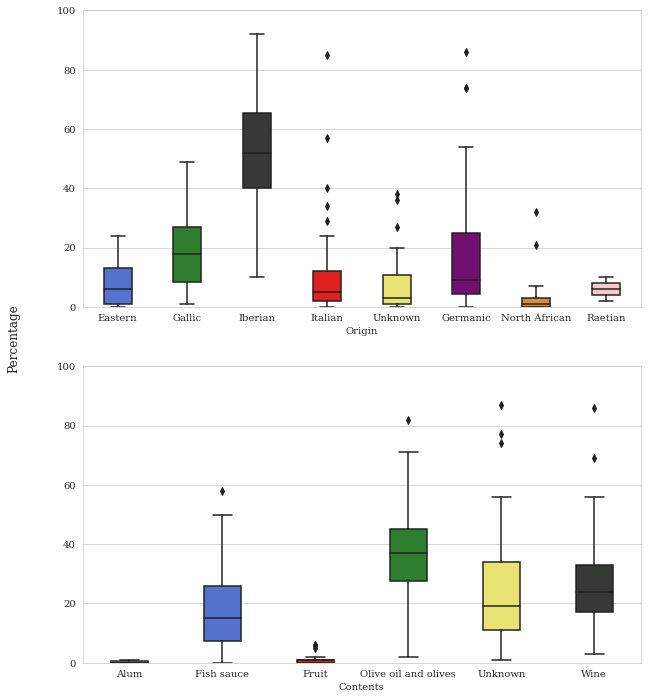

In [14]:
fig = plt.figure(figsize=(10, 12))
gs = fig.add_gridspec(2, 1)

with sns.axes_style("whitegrid", {"font.family":"serif", "font.serif":"Times New Roman"}):
    ax1 = fig.add_subplot(gs[0])
    sns.boxplot(x = "origin_h1", y = "percentage", data = merged_df0, ax = ax1, palette=["#4169E1", "#228B22", "#353935", "red", "#FCF55F", "purple", "#F28C28", "pink"], width = 0.4)
    ax1.set_ylabel(None)
    ax1.set_xlabel("Origin")
    ax1.set_xticklabels(["Eastern", "Gallic", "Iberian", "Italian", "Unknown", "Germanic", "North African",  "Raetian"])
    ax1.set_ylim([0, 100])

    ax2 = fig.add_subplot(gs[1])
    sns.boxplot(x = "contents", y = "percentage", data = merged_df1, ax = ax2, palette=["pink", "#4169E1", "red", "#228B22", "#FCF55F", "#353935"],width = 0.4)
    ax2.set_ylabel(None)
    ax2.set_xlabel("Contents")
    ax2.set_xticklabels(["Alum", "Fish sauce", "Fruit", "Olive oil and olives", "Unknown", "Wine"])
    ax2.set_ylim([0, 100])
    
    fig.supylabel("Percentage")

plt.savefig("Figs/Fig1.tiff", bbox_inches="tight", format = "tiff", dpi = 400)